In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LINA

In [2]:
X = np.loadtxt('Density.txt')
n = X.shape[0]
d = X.shape[1]
d -= 1
print(n,d)

510 190


In [3]:
n_train = int(n*0.8)
n_test  = n - n_train
X = np.random.permutation(X)

X_train = np.zeros((n_train,d))
X_test  = np.zeros((n_test,d))
Y_train = np.zeros((n_train))
Y_test = np.zeros((n_test))

X_train[:] = X[:n_train,:-1]
Y_train[:] = X[:n_train,-1]

X_test[:] = X[n_train:,:-1]
Y_test[:] = X[n_train:,-1]

print(X_train.shape)
print(X_test.shape)

f = open('Deslist','r')
Deslist = []
for line in f:
    Deslist.append(line.strip('\n\t'))
print(Deslist)

(408, 190)
(102, 190)
['steiger', 'Marsili Partial Charges', 'BalabanJ', 'BertzCT', 'Ipc', 'HallKierAlpha', 'Kappa1', 'Kappa2', 'Kappa3', 'Chi0', 'Chi1', 'Chi0n', 'Chi1n', 'Chi2n', 'Chi3n', 'Chi4n', 'Chi0v', 'Chi1v', 'Chi2v', 'Chi3v', 'Chi4v', 'MolLogP', 'MolMR', 'MolWt', 'HeavyAtomCount', 'HeavyAtomMolWt', 'NHOHCount', 'NOCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons', 'RingCount', 'TPSA', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'SMR_VSA1', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SMR_VSA10', 'SlogP_VSA1', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'EState_VSA1', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', '

In [4]:
converged = False
w = np.zeros(d)
yh = np.zeros(n_train)
rgl= 5000
w0 = w0last = 0
ITR = 1000
itr = 0
L = np.zeros(ITR)
while not converged: 
    yh = np.add(X_train.dot(w), w0*np.ones(n_train))
    w0last = w0
    wlast = np.copy(w)
    w0 = np.sum(np.subtract(Y_train, yh))/n_train
    yh = np.add(yh,(w0-w0last)*np.ones(n_train))
    for k in range (0,d):
        Xk = X_train[:,k]
        ak = Xk.T.dot(Xk)
        ck = Xk.T.dot(Y_train-yh+w[k]*Xk)
        if ck < (-1 * rgl):
            w[k] = (ck + rgl)/ak
        elif ck > rgl:
            w[k] = (ck - rgl)/ak
        else:
            w[k] = 0
        yh = np.add(yh,(w[k]-wlast[k])*X_train[:,k])    
    SUB = np.subtract(w, wlast)
    check = np.dot(SUB.T,SUB)
    if (check< 0.0000000001):
        converged = True
        break     
    itr += 1
    if itr == ITR:
        break

In [5]:
y_train = np.add(X_train.dot(w), w0*np.ones(n_train))
print(LINA.norm(Y_train-y_train))
D = int((d-2)/2)
for i in range(d):
    if w[i]>0 :
        if (i<D):
            print("CATION",Deslist[i])
        if (i>=D and i<2*D):
            print("ANION",Deslist[i-D])
        if (i == d-2):
            print("T")
        if (i == d-1):
            print("P")
        

376.059154874
CATION steiger
CATION Marsili Partial Charges
CATION BertzCT
CATION Ipc
CATION EState_VSA7
CATION Topliss fragments
ANION steiger
ANION Marsili Partial Charges
ANION Kappa3
ANION MolWt
ANION HeavyAtomMolWt
ANION TPSA
ANION PEOE_VSA10
ANION SMR_VSA1
ANION EState_VSA9
ANION VSA_EState8
P


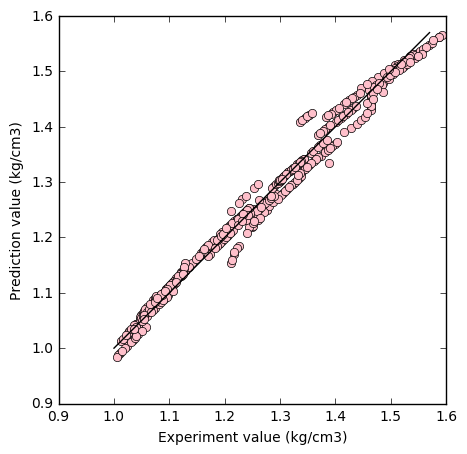

In [10]:
y_train = np.add(X_train.dot(w), w0*np.ones(n_train))
plt.figure(figsize=(5,5))
plt.plot(Y_train/1000,y_train/1000,"o",color ='pink')
plt.plot(np.arange(1,1.57,0.00001),np.arange(1,1.57,0.00001),color = 'black')
plt.axis([0.9,1.6,0.9,1.6])
plt.xlabel('Experiment value (kg/cm3)')
plt.ylabel('Prediction value (kg/cm3)')
plt.show()

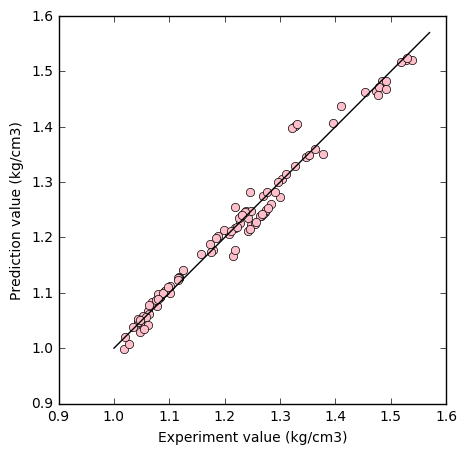

In [7]:
y_test = np.add(X_test.dot(w), w0*np.ones(n_test))
plt.figure(figsize=(5,5))
plt.plot(Y_test/1000,y_test/1000,"o",color ='pink')
plt.plot(np.arange(1,1.57,0.00001),np.arange(1,1.57,0.00001),color = 'black')
plt.axis([0.9,1.6,0.9,1.6])
plt.xlabel('Experiment value (kg/cm3)')
plt.ylabel('Prediction value (kg/cm3)')

plt.show()